<a href="https://colab.research.google.com/github/KayoNascimento/PySparkSQL_Project/blob/main/SaaS_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**PySparkSQL - Manipulação e Análise Exploratória de Dados.**
####**Sobre o Apache Spark**
Apache Spark é uma ferramenta desenvolvida para o processamento de dados em larga escala possuindo uma arquitetura de escalabilidade horizontal, permitindo que o processamento seja executado em mais de uma máquina/nó. O Spark também processa dados diretamente na memória sem a necessidade de acesso para escrita e leitura no disco rígido.\
Esse framework disponibiliza APIs para trabalhar em Java, Python, Scala e R. Ele também fornece ferramentas de alto nível como SparkSQL, para dados estruturados, biblioteca MLIB para o aprendizado de máquina, integração com  API do Pandas e até streaming de dados.

####**PySpark**
Para esse projeto utilizarei o PySpark que é a API do Python para Apache Spark, que permite utilizar de todos os recursos do Spark com a linguagem Python.\
Como os recursos e funções do Apache Spark são bastante extensos, focarei somente na utilização do módulo **PySparkSQl e Dataframes** para manipular e analisar os dados estruturados que usarei nesse projeto.




####**Sobre o projeto**
Nesse projeto o objetivo será explorar os recursos do módulo PySpark Dataframes e PySparkSQL, que nos permite combinar consultas SQL com as ferramentas e flexibilidade de processamento do Apache Spark junto da linguagem Python.

E para aplicar algumas das muitas funcionalidades disponíveis nos módulos , usarei um conjunto de dados fictícios do Kaggle que simula as transações de uma empresa,
 chamada Saas, que fornece software de vendas e markenting para outras empresas. Ao todo o conjunto possui apenas 9.994 registros no total.

 **Download -** [SaaS Sales Dataset](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales/download?datasetVersionNumber=1)  

In [ ]:
# Instalando Pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=8a2e5b01a8d1584a5f29af4c0873be11452e175b78a218df5ac93d2e0a21aa05
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
#Importando módulos do Pyspark
from pyspark.sql import SparkSession
from pyspark.sql.dataframe import *
from pyspark.sql.udf import UserDefinedFunction
from pyspark.sql.functions import *
from pyspark.sql.types import DateType, IntegerType, FloatType


In [ ]:
#Criando a sessão Spark
spark = SparkSession.builder.getOrCreate()

In [ ]:
#Lendo o arquivo CSV e atribuindo como df
df = spark.read.csv('/content/drive/MyDrive/MyAnalysis/SaaS-Sales.csv', header=True)

In [ ]:
#Exibindo as 10 primeiras linhas
df.show(10)

+------+----------------+----------+--------+--------------+-------------+-------------+------+---------+-----------------+-----------+--------+---------+--------------------+----------+--------+--------+--------+--------+
|Row ID|        Order ID|Order Date|Date Key|  Contact Name|      Country|         City|Region|Subregion|         Customer|Customer ID|Industry|  Segment|             Product|   License|   Sales|Quantity|Discount|  Profit|
+------+----------------+----------+--------+--------------+-------------+-------------+------+---------+-----------------+-----------+--------+---------+--------------------+----------+--------+--------+--------+--------+
|     1|EMEA-2022-152156| 11/9/2022|20221109|   Nathan Bell|      Ireland|       Dublin|  EMEA|     UKIR|          Chevron|       1017|  Energy|      SMB|     Marketing Suite|16GRM07R1K|  261.96|       2|       0| 41.9136|
|     2|EMEA-2022-152156| 11/9/2022|20221109|   Nathan Bell|      Ireland|       Dublin|  EMEA|     UKIR|   

###**Tratamento/Limpeza dos dados**
Essa etapa precede qualquer trabalho dentro da análise de dados(com exceção do carregamento), pois raramente os dados chegam em perfeito estado para utilização, e para evitar vieses na análise, a correção precisa ser aplicada para que a precisão dos dados não seja prejudicada. Dentre as correções necessárias, as principais seriam: a verificação valores faltantes/nulos, correção do tipo de dado, dados duplicados, valores inconsistentes, correções ortográficas e muitos outros. Lembrando que a aplicação de  todos esses cuidados nem sempre serão necessários, pois dependerá do objetivo de cada análise e dos dados utilizados.     

####**Correção do Tipo de dado(DataType) das colunas.**

In [ ]:
#Imprimindo o tipo de dado de cada coluna
df.dtypes

[('Row ID', 'string'),
 ('Order ID', 'string'),
 ('Order Date', 'string'),
 ('Date Key', 'string'),
 ('Contact Name', 'string'),
 ('Country', 'string'),
 ('City', 'string'),
 ('Region', 'string'),
 ('Subregion', 'string'),
 ('Customer', 'string'),
 ('Customer ID', 'string'),
 ('Industry', 'string'),
 ('Segment', 'string'),
 ('Product', 'string'),
 ('License', 'string'),
 ('Sales', 'string'),
 ('Quantity', 'string'),
 ('Discount', 'string'),
 ('Profit', 'string')]

Após visualizar o DataType das colunas , nota-se que algumas não condizem com seus registros, como a coluna 'Order Date' que esta com o tipo String ao invés do tipo Date.
   

Correção da coluna Order Date

In [ ]:
# extraindo o mês, dia, ano separadamente com split dentro da função lambda e armazenando na variável.
# UserDefinedFunction é semelhante a função nativa def do Python que recebe um argumento como parâmetro.

mes = UserDefinedFunction(lambda x: x.split('/')[0])# [0] [1] [2]
dia = UserDefinedFunction(lambda x: x.split('/')[1])# mes/dia/ano
ano = UserDefinedFunction(lambda x: x.split('/')[2])

In [ ]:
# Com o WithColumn cria-se uma coluna para mes, dia e ano separadamente.
# No primeiro argumento coloca-se o nome da coluna e no segundo a função definida com o nome da coluna.
df = df.withColumn('mes', mes('Order Date'))
df = df.withColumn('dia', dia('Order Date'))
df = df.withColumn('ano', ano('Order Date'))

In [ ]:
# mes, dia, ano extraido e separado em cada coluna.
df.select('Order Date', 'mes', 'dia', 'ano').show(10)

+----------+---+---+----+
|Order Date|mes|dia| ano|
+----------+---+---+----+
| 11/9/2022| 11|  9|2022|
| 11/9/2022| 11|  9|2022|
| 6/13/2022|  6| 13|2022|
|10/11/2021| 10| 11|2021|
|10/11/2021| 10| 11|2021|
|  6/9/2020|  6|  9|2020|
|  6/9/2020|  6|  9|2020|
|  6/9/2020|  6|  9|2020|
|  6/9/2020|  6|  9|2020|
|  6/9/2020|  6|  9|2020|
+----------+---+---+----+
only showing top 10 rows



In [ ]:
# Sobrepondo a coluna 'Order Date' com o formato correto em ano-mes-dia.
df = df.withColumn('Order Date', concat_ws('-', 'ano', 'mes', 'dia'))

In [ ]:
#convertendo a Datatype da coluna 'Order Date' para o tipo Date.
df = df.withColumn('Order Date', df['Order Date'].cast(DateType()))

In [ ]:
#verificando o Datatype após correção.
df.printSchema()

root
 |-- Row ID: string (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: date (nullable = true)
 |-- Date Key: string (nullable = true)
 |-- Contact Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- Customer: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- License: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: string (nullable = true)
 |-- mes: string (nullable = true)
 |-- dia: string (nullable = true)
 |-- ano: string (nullable = true)



correção das demais colunas

In [ ]:
df = df.withColumn('Sales', df['Sales'].cast(FloatType()))\
  .withColumn('Quantity', df['Quantity'].cast(IntegerType()))\
  .withColumn('Discount', df['Discount'].cast(FloatType()))\
  .withColumn('Profit', df['Profit'].cast(FloatType()))\
  .withColumn('Customer ID', df['Customer ID'].cast(IntegerType()))\
  .withColumn('Date Key', df['Date Key'].cast(IntegerType()))

In [ ]:
df.printSchema()

root
 |-- Row ID: string (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: date (nullable = true)
 |-- Date Key: integer (nullable = true)
 |-- Contact Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- Customer: string (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- License: string (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Profit: float (nullable = true)
 |-- mes: string (nullable = true)
 |-- dia: string (nullable = true)
 |-- ano: string (nullable = true)



#### **Verificando valores duplicados**
Para essa operação o Pyspark não dispôem de uma função específica para verificar se uma linha é duplicada ou não. Para fazer a checagem utilizei a função join, agrupando o dataframe por todas as colunas e depois a função agg para utilizar o count. Após a execução é retornado: false e true, onde false indica que a linha não é duplicada e true que a linha é duplicada.

No final aparece o filter para exibir os valores correspondentes a true.  


In [ ]:
df.join(
    df.groupBy(df.columns).agg((count("*")>1).alias("True_False")),
    on=df.columns,
    how="inner"
).filter('True_False == true').show()

+------+--------+----------+--------+------------+-------+----+------+---------+--------+-----------+--------+-------+-------+-------+-----+--------+--------+------+---+---+---+----------+
|Row ID|Order ID|Order Date|Date Key|Contact Name|Country|City|Region|Subregion|Customer|Customer ID|Industry|Segment|Product|License|Sales|Quantity|Discount|Profit|mes|dia|ano|True_False|
+------+--------+----------+--------+------------+-------+----+------+---------+--------+-----------+--------+-------+-------+-------+-----+--------+--------+------+---+---+---+----------+
+------+--------+----------+--------+------------+-------+----+------+---------+--------+-----------+--------+-------+-------+-------+-----+--------+--------+------+---+---+---+----------+



Por fim o Dataframe não apresenta nenhum valor repetido.

#### **Valores Nulos**
No Pyspark não existe também, uma função que retorne todos os valores nulos de uma tabela. Para improvisar usa-se o laço de repetição **for** para iterar por cada uma das colunas, passando pelo filter para verificação e count no final.


In [ ]:
#for column in df.columns:
#    print(column, df.filter(df[column].isNull()).count())

###**Análise Exploratória**

In [ ]:
#Importando biblioteca para visualização
import seaborn as sns
import matplotlib.pyplot as plt


####Top 10 cidades com melhores retornos de Lucro.

In [ ]:
df.groupBy('City').agg(sum('Profit').alias('Lucro')).sort(desc('Lucro')).show(10)

+-------------+------------------+
|         City|             Lucro|
+-------------+------------------+
|       London| 62218.61351630092|
|New York City| 30308.48850081116|
|      Toronto|29176.828871920705|
|  Los Angeles|17507.385445073247|
|    São Paulo|13939.301159441471|
|     Helsinki|11970.481712073088|
|   Luxembourg| 10823.18750333786|
|       Mumbai|10375.913979172707|
|       Manila|  8194.08354640007|
|       Dublin| 7522.291551589966|
+-------------+------------------+
only showing top 10 rows



####Calculando o Ticket médio de cada cliente

In [ ]:
df.groupBy('Customer').agg(((sum('Sales')) / (count('*'))).alias("Ticket_médio")).orderBy(desc("Ticket_médio")).show()

+--------------------+------------------+
|            Customer|      Ticket_médio|
+--------------------+------------------+
|              Anthem|415.81500414414194|
|       Valero Energy|392.57542029789516|
|            Allstate| 380.3965708971024|
|               Lowes| 366.9105663386258|
|            Alphabet|366.28320189497686|
|           Coca-Cola| 353.6271990007824|
|                 BMW|352.10621043046314|
|              Humana| 352.0500003542219|
|    Costco Wholesale|351.55970753392864|
|         Honda Motor| 332.0267855525017|
|     Trafigura Group| 324.7293871143489|
|        Nissan Motor|323.58315538423403|
|              Target|321.14548860034165|
|         Phillips 66|320.94206809165865|
|Bank of America C...| 312.5450555357066|
|  UnitedHealth Group| 303.4622837428389|
|              Lukoil| 303.4412338384267|
|         Walt Disney|  286.242764972946|
|            Glencore|279.44909304380417|
|           Citigroup|278.75096184557134|
+--------------------+------------

####Média da quantidade de produtos comprada por cada cliente

In [ ]:
df.groupBy('Customer').agg(mean('Quantity')).show()

+--------------------+------------------+
|            Customer|     avg(Quantity)|
+--------------------+------------------+
|       HSBC Holdings| 4.096385542168675|
|          Volkswagen| 3.544776119402985|
|Prudential Financial|3.5844155844155843|
|   AmerisourceBergen| 4.040268456375839|
|  Marathon Petroleum|3.6835443037974684|
|             Gazprom| 3.641509433962264|
|               Bosch|3.9831932773109244|
|J.P. Morgan Chase...| 3.702970297029703|
|United Parcel Ser...| 3.909090909090909|
|             Walmart|3.6695652173913045|
|   Royal Dutch Shell| 3.287037037037037|
|                Sony|  3.84297520661157|
|Mondelez Internat...| 3.629370629370629|
|               Merck| 3.732394366197183|
|             Allianz|3.6927083333333335|
|              Itochu| 3.647887323943662|
|          Fannie Mae|  4.03921568627451|
|   Johnson & Johnson| 3.462121212121212|
|    General Electric|3.9423076923076925|
|              Humana|               3.6|
+--------------------+------------

####Frequência das quantidades compradas  

In [ ]:
df.groupBy('Quantity').agg((count('*')).alias('frequência')).orderBy(desc('frequência')).show()

+--------+----------+
|Quantity|frequência|
+--------+----------+
|       3|      2409|
|       2|      2402|
|       5|      1230|
|       4|      1191|
|       1|       899|
|       7|       606|
|       6|       572|
|       9|       258|
|       8|       257|
|      10|        57|
|      11|        34|
|      14|        29|
|      13|        27|
|      12|        23|
+--------+----------+



In [ ]:
#Convertendo dataframe pyspark para pandas dataframe, para geração de gráficos.
df_pd = df.toPandas()

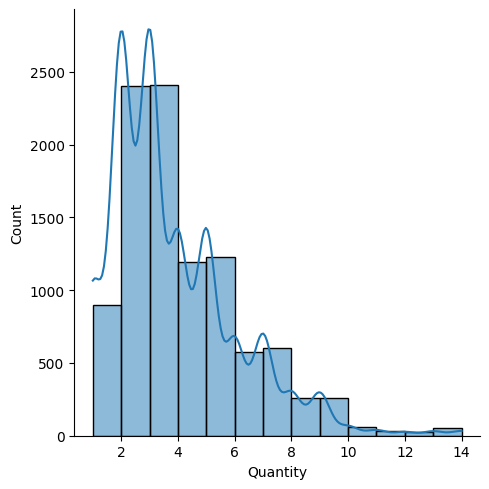

In [ ]:
#Visualizando frequências com Histograma.
sns.displot(df_pd, x='Quantity', bins=13, kde=True)

####Frequência de cada desconto aplicado  

In [ ]:
df.groupBy('Discount').agg((count('*')).alias('frequência')).orderBy(desc('frequência')).show()

+--------+----------+
|Discount|frequência|
+--------+----------+
|     0.0|      4798|
|     0.2|      3657|
|     0.7|       418|
|     0.8|       300|
|     0.3|       227|
|     0.4|       206|
|     0.6|       138|
|     0.1|        94|
|     0.5|        66|
|    0.15|        52|
|    0.32|        27|
|    0.45|        11|
+--------+----------+



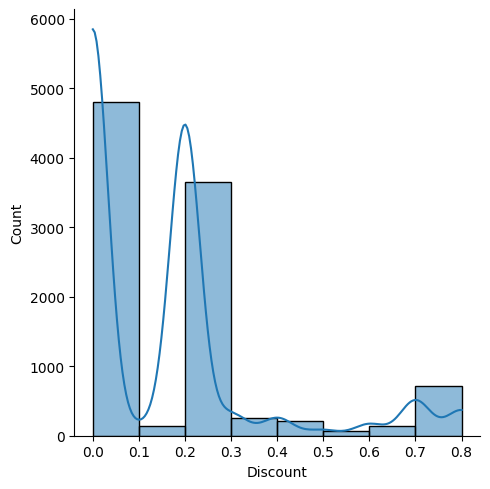

In [ ]:
sns.displot(df_pd, x='Discount', bins=8, kde=True)

In [ ]:
df_filter = df.select('Country', 'City', 'Customer', 'Industry', 'Segment', 'Product', 'Sales', 'Quantity', 'Discount','Profit')

In [ ]:
# Somando lucros de vendas com zero desconto
discount_0 = df_filter.filter((df_filter['Profit'] > 0) & (df_filter['Discount'] == 0))
discount_0.select(sum(discount_0['Profit']).alias('lucro_sem_desconto')).show()

+------------------+
|lucro_sem_desconto|
+------------------+
| 320987.6030244753|
+------------------+



In [ ]:
# Somando lucros de vendas com desconto aplicado
discount = df_filter.filter((df_filter['Profit'] > 0) & (df_filter['Discount'] > 0))
discount.select(sum(discount['Profit']).alias('lucro_com_desconto')).show()

+------------------+
|lucro_com_desconto|
+------------------+
|121540.70350269973|
+------------------+



In [ ]:
#Filtrando registros com lucros negativos
# df_filter.filter(df_filter['Profit'] <= 0).count() # output:1936
df_filter.filter(df_filter['Profit'] <= 0).show()

+------------+---------+--------------------+-----------------+----------+--------------------+--------+--------+--------+----------+
|     Country|     City|            Customer|         Industry|   Segment|             Product|   Sales|Quantity|Discount|    Profit|
+------------+---------+--------------------+-----------------+----------+--------------------+--------+--------+--------+----------+
|     Germany|Stuttgart|   Royal Dutch Shell|           Energy|       SMB|      ContactMatcher|957.5775|       5|    0.45|  -383.031|
|       Japan|  Saitama|              Pfizer|       Healthcare|Enterprise|             OneView|   68.81|       5|     0.8|  -123.858|
|       Japan|  Saitama|              Pfizer|       Healthcare|Enterprise|      ContactMatcher|   2.544|       3|     0.8|    -3.816|
|      France|    Paris|    Costco Wholesale|           Retail|       SMB|          FinanceHub|  71.372|       2|     0.3|   -1.0196|
|      France|    Paris|               Intel|             Tech

###**Sumário da análise**

*   A Saas obteve um lucro total de $442.527, desconsiderando os lucros negativos. Dessa soma 41% das vendas tiveram descontos aplicados.

*   Ao todo 1.936 vendas não apresentaram lucros positivos.

* A média da quantidade de produtos compradas por cada cliente ficou entre 3 a 4 para cada pedido.

* Anthem foi o cliente que apresentou o maior Ticket Médio com $415, considerando a média de \$231.





